In [23]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
random.seed(42)

In [5]:
# Simulate BatchRecord
batch_ids = [f"BATCH_{i:03d}" for i in range(1, 51)]
products = ["Product_A", "Product_B"]
defect_types = [None, "pH Out-of-Spec", "Low Yield", "Contamination"]
status_choices = ["Pass", "Fail"]

batch_data = []
for batch_id in batch_ids:
    start_time = datetime(2023, 1, 1) + timedelta(days=random.randint(0, 60), hours=random.randint(5, 9))
    end_time = start_time + timedelta(hours=random.randint(7, 12))
    status = random.choices(status_choices, weights=[0.8, 0.2])[0]
    defect = random.choice(defect_types) if status == "Fail" else None
    batch_data.append([
        batch_id, random.choice(products), start_time, end_time,
        f"OP_{random.randint(1, 5)}", f"EQ_{random.randint(1, 3)}",
        status, defect, random.randint(1, 5) if defect else None
    ])

batch_df = pd.DataFrame(batch_data, columns=[
    "batch_id", "product_id", "start_time", "end_time", "operator_id",
    "equipment_id", "status", "defect_type", "defect_severity"
])
batch_df

,batch_id,product_id,start_time,end_time,operator_id,equipment_id,status,defect_type,defect_severity
0,BATCH_001,Product_A,2023-02-10 05:00:00,2023-02-10 12:00:00,OP_2,EQ_1,Pass,None,NaN
1,BATCH_002,Product_A,2023-02-17 05:00:00,2023-02-17 17:00:00,OP_5,EQ_2,Pass,None,NaN
2,BATCH_003,Product_A,2023-01-03 05:00:00,2023-01-03 12:00:00,OP_5,EQ_1,Pass,None,NaN
3,BATCH_004,Product_B,2023-02-15 09:00:00,2023-02-15 19:00:00,OP_1,EQ_1,Pass,None,NaN
4,BATCH_005,Product_A,2023-02-14 08:00:00,2023-02-14 17:00:00,OP_3,EQ_1,Pass,None,NaN
5,BATCH_006,Product_B,2023-01-06 08:00:00,2023-01-06 15:00:00,OP_5,EQ_2,Pass,None,NaN
6,BATCH_007,Product_A,2023-02-21 05:00:00,2023-02-21 17:00:00,OP_4,EQ_1,Pass,None,NaN
7,BATCH_008,Product_B,2023-02-05 07:00:00,2023-02-05 19:00:00,OP_5,EQ_1,Pass,None,NaN
8,BATCH_009,Product_B,2023-02-15 05:00:00,2023-02-15 12:00:00,OP_1,EQ_1,Pass,None,NaN
9,BATCH_010,Product_B,2023-02-25 05:00:00,2023-02-25 15:00:00,OP_2,EQ_2,Pass,None,NaN


In [39]:
# Simulate ProcessData
process_steps = ["Mixing", "Heating", "Cooling"]
parameters = ["Temperature", "pH", "Pressure"]

process_data = []
for batch_id in batch_ids:
    for step in process_steps:
        for param in parameters:
            for _ in range(3):  # simulate 3 readings per param
                value = np.random.normal(37, 2) if param == "Temperature" else (
                        np.random.normal(7, 0.5) if param == "pH" else
                        np.random.normal(1.0, 0.1))
                process_data.append([
                    batch_id, step, param, round(value, 2),
                    datetime.now() - timedelta(days=random.randint(0, 30))
                ])

process_df = pd.DataFrame(process_data, columns=[
    "batch_id", "step_name", "parameter_name", "parameter_value", "timestamp"
])

In [7]:
process_df[process_df.batch_id=='BATCH_005']

,batch_id,step_name,parameter_name,parameter_value,timestamp
108,BATCH_005,Mixing,Temperature,37.52,2025-03-18 18:22:15.991191
109,BATCH_005,Mixing,Temperature,36.85,2025-03-26 18:22:15.991200
110,BATCH_005,Mixing,Temperature,33.16,2025-03-27 18:22:15.991207
111,BATCH_005,Mixing,pH,6.99,2025-03-07 18:22:15.991214
112,BATCH_005,Mixing,pH,7.03,2025-03-04 18:22:15.991221
113,BATCH_005,Mixing,pH,8.23,2025-03-19 18:22:15.991228
114,BATCH_005,Mixing,Pressure,0.98,2025-03-22 18:22:15.991235
115,BATCH_005,Mixing,Pressure,1.03,2025-03-24 18:22:15.991242
116,BATCH_005,Mixing,Pressure,1.00,2025-03-07 18:22:15.991249
117,BATCH_005,Heating,Temperature,34.66,2025-03-08 18:22:15.991256


In [40]:
#process_data = []

# Define number of steps and readings per param
process_steps = ["Mixing", "Heating", "Cooling"]
parameters = ["Temperature", "pH", "Pressure"]
readings_per_param = 3

for _, row in batch_df.iterrows():
    batch_id = row["batch_id"]
    start_time = row["start_time"]
    end_time = row["end_time"]
    
    total_intervals = len(process_steps) * len(parameters) * readings_per_param
    time_delta = (end_time - start_time) / total_intervals
    current_time = start_time

    for step in process_steps:
        for param in parameters:
            for _ in range(readings_per_param):
                # Generate parameter value based on type
                if param == "Temperature":
                    value = round(np.random.normal(37, 2), 2)
                elif param == "pH":
                    value = round(np.random.normal(7, 0.5), 2)
                elif param == "Pressure":
                    value = round(np.random.normal(1.0, 0.1), 2)

                # Append process record with timestamp in order
                process_data.append([
                    batch_id, step, param, value, current_time
                ])
                current_time += time_delta

process_df = pd.DataFrame(process_data, columns=[
    "batch_id", "step_name", "parameter_name", "parameter_value", "timestamp"
])



In [9]:
 #Simulate QCResults
qc_tests = ["API Concentration", "Impurity", "Sterility"]
qc_data = []
for batch_id in batch_ids:
    for test in qc_tests:
        result = round(np.random.normal(95, 2), 2) if test == "API Concentration" else (
                 round(np.random.normal(0.5, 0.2), 2) if test == "Impurity" else
                 random.choice(["Pass", "Fail"]))
        spec_min, spec_max = (90, 100) if test == "API Concentration" else (
                             (0.0, 1.0) if test == "Impurity" else (None, None))
        unit = "%" if test in ["API Concentration", "Impurity"] else "Result"
        pass_fail = (spec_min <= result <= spec_max) if isinstance(result, float) else (result == "Pass")
        qc_data.append([
            batch_id, test, result, spec_min, spec_max, unit, pass_fail
        ])

qc_df = pd.DataFrame(qc_data, columns=[
    "batch_id", "test_name", "test_result", "spec_min", "spec_max", "test_unit", "pass_fail"
])
qc_df

,batch_id,test_name,test_result,spec_min,spec_max,test_unit,pass_fail
0,BATCH_001,API Concentration,95.77,90.0,100.0,%,True
1,BATCH_001,Impurity,0.72,0.0,1.0,%,True
2,BATCH_001,Sterility,Pass,NaN,NaN,Result,True
3,BATCH_002,API Concentration,99.02,90.0,100.0,%,True
4,BATCH_002,Impurity,0.7,0.0,1.0,%,True
...,...,...,...,...,...,...,...
145,BATCH_049,Impurity,0.14,0.0,1.0,%,True
146,BATCH_049,Sterility,Fail,NaN,NaN,Result,False
147,BATCH_050,API Concentration,94.28,90.0,100.0,%,True
148,BATCH_050,Impurity,0.56,0.0,1.0,%,True


In [10]:
# Simulate QAEvents
qa_events = []
for batch_id in random.sample(batch_ids, 15):  # only some batches have QA events
    qa_events.append([
        batch_id, random.choice(["Deviation", "CAPA", "Audit Finding"]),
        "Description of QA event", datetime.now() - timedelta(days=random.randint(0, 30)),
        random.randint(1, 5)
    ])

qa_df = pd.DataFrame(qa_events, columns=[
    "batch_id", "event_type", "description", "event_time", "severity"
])

qa_df

,batch_id,event_type,description,event_time,severity
0,BATCH_039,Deviation,Description of QA event,2025-03-28 18:22:24.523672,3
1,BATCH_001,Deviation,Description of QA event,2025-03-29 18:22:24.523708,4
2,BATCH_018,Audit Finding,Description of QA event,2025-03-30 18:22:24.523721,1
3,BATCH_010,CAPA,Description of QA event,2025-03-19 18:22:24.523732,3
4,BATCH_009,Audit Finding,Description of QA event,2025-03-15 18:22:24.523743,1
5,BATCH_035,CAPA,Description of QA event,2025-03-17 18:22:24.523753,2
6,BATCH_017,Audit Finding,Description of QA event,2025-04-01 18:22:24.523763,5
7,BATCH_012,CAPA,Description of QA event,2025-03-19 18:22:24.523773,1
8,BATCH_008,Deviation,Description of QA event,2025-03-18 18:22:24.523783,4
9,BATCH_002,CAPA,Description of QA event,2025-03-12 18:22:24.523793,1


In [11]:
# Simulate SupplyChainInfo
materials = ["API", "Solvent", "Excipient"]
suppliers = ["Supplier_X", "Supplier_Y", "Supplier_Z"]

supply_data = []
for batch_id in batch_ids:
    for material in materials:
        supply_data.append([
            batch_id, material, random.choice(suppliers),
            f"LOT_{random.randint(100, 999)}",
            datetime(2023, 1, 1) + timedelta(days=random.randint(0, 30)),
            random.choice(["Room Temp", "Refrigerated"]),
            round(np.random.uniform(80, 100), 1)
        ])

supply_df = pd.DataFrame(supply_data, columns=[
    "batch_id", "material_name", "supplier_id", "lot_number",
    "delivery_date", "storage_condition", "material_quality_score"
])
supply_df

,batch_id,material_name,supplier_id,lot_number,delivery_date,storage_condition,material_quality_score
0,BATCH_001,API,Supplier_Z,LOT_829,2023-01-11,Refrigerated,91.6
1,BATCH_001,Solvent,Supplier_Z,LOT_643,2023-01-10,Refrigerated,90.1
2,BATCH_001,Excipient,Supplier_Z,LOT_719,2023-01-14,Room Temp,82.9
3,BATCH_002,API,Supplier_Z,LOT_217,2023-01-28,Room Temp,92.5
4,BATCH_002,Solvent,Supplier_Y,LOT_562,2023-01-29,Room Temp,85.5
...,...,...,...,...,...,...,...
145,BATCH_049,Solvent,Supplier_Y,LOT_916,2023-01-17,Refrigerated,93.4
146,BATCH_049,Excipient,Supplier_X,LOT_844,2023-01-14,Room Temp,98.7
147,BATCH_050,API,Supplier_Y,LOT_716,2023-01-27,Room Temp,85.3
148,BATCH_050,Solvent,Supplier_Z,LOT_400,2023-01-11,Room Temp,92.2


In [12]:
combined_df = process_df.merge(batch_df, on="batch_id", how="left")

qc_pivot = qc_df.pivot_table(
    index='batch_id', 
    columns='test_name', 
    values='test_result', 
    aggfunc='first'
).reset_index()

combined_df = combined_df.merge(qc_pivot, on="batch_id", how="left")

qa_summary = qa_df.groupby("batch_id").agg({
    "event_type": lambda x: ', '.join(set(x)),
    "severity": "max"
}).reset_index().rename(columns={
    "event_type": "qa_events",
    "severity": "qa_max_severity"
})

combined_df = combined_df.merge(qa_summary, on="batch_id", how="left")

supply_pivot = supply_df.pivot_table(
    index="batch_id",
    columns="material_name",
    values="material_quality_score",
    aggfunc="mean"
).reset_index().rename(columns={
    "API": "api_quality_score",
    "Solvent": "solvent_quality_score",
    "Excipient": "excipient_quality_score"
})

combined_df = combined_df.merge(supply_pivot, on="batch_id", how="left")
combined_df

,batch_id,step_name,parameter_name,parameter_value,timestamp,product_id,start_time,end_time,operator_id,equipment_id,...,defect_type,defect_severity,API Concentration,Impurity,Sterility,qa_events,qa_max_severity,api_quality_score,excipient_quality_score,solvent_quality_score
0,BATCH_001,Mixing,Temperature,37.99,2025-03-27 18:22:15.990362,Product_A,2023-02-10 05:00:00,2023-02-10 12:00:00,OP_2,EQ_1,...,None,NaN,95.77,0.72,Pass,Deviation,4.0,91.6,82.9,90.1
1,BATCH_001,Mixing,Temperature,36.72,2025-03-11 18:22:15.990411,Product_A,2023-02-10 05:00:00,2023-02-10 12:00:00,OP_2,EQ_1,...,None,NaN,95.77,0.72,Pass,Deviation,4.0,91.6,82.9,90.1
2,BATCH_001,Mixing,Temperature,38.30,2025-03-23 18:22:15.990422,Product_A,2023-02-10 05:00:00,2023-02-10 12:00:00,OP_2,EQ_1,...,None,NaN,95.77,0.72,Pass,Deviation,4.0,91.6,82.9,90.1
3,BATCH_001,Mixing,pH,7.76,2025-03-27 18:22:15.990432,Product_A,2023-02-10 05:00:00,2023-02-10 12:00:00,OP_2,EQ_1,...,None,NaN,95.77,0.72,Pass,Deviation,4.0,91.6,82.9,90.1
4,BATCH_001,Mixing,pH,6.88,2025-03-12 18:22:15.990440,Product_A,2023-02-10 05:00:00,2023-02-10 12:00:00,OP_2,EQ_1,...,None,NaN,95.77,0.72,Pass,Deviation,4.0,91.6,82.9,90.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,BATCH_050,Cooling,pH,7.72,2023-02-26 14:46:40.000000,Product_B,2023-02-26 05:00:00,2023-02-26 17:00:00,OP_3,EQ_3,...,None,NaN,94.28,0.56,Pass,NaN,NaN,85.3,93.6,92.2
2696,BATCH_050,Cooling,pH,7.54,2023-02-26 15:13:20.000000,Product_B,2023-02-26 05:00:00,2023-02-26 17:00:00,OP_3,EQ_3,...,None,NaN,94.28,0.56,Pass,NaN,NaN,85.3,93.6,92.2
2697,BATCH_050,Cooling,Pressure,0.87,2023-02-26 15:40:00.000000,Product_B,2023-02-26 05:00:00,2023-02-26 17:00:00,OP_3,EQ_3,...,None,NaN,94.28,0.56,Pass,NaN,NaN,85.3,93.6,92.2
2698,BATCH_050,Cooling,Pressure,1.06,2023-02-26 16:06:40.000000,Product_B,2023-02-26 05:00:00,2023-02-26 17:00:00,OP_3,EQ_3,...,None,NaN,94.28,0.56,Pass,NaN,NaN,85.3,93.6,92.2


In [60]:
len(combined_df[combined_df.status == 'Pass']), len(combined_df[combined_df.status == 'Fail'])

(2106, 594)

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder


df = combined_df.copy()

### --- 1. Handle Missing Values ---
# Fill missing QC results with mean or mode depending on type
qc_columns = ["API Concentration", "Impurity"]
for col in qc_columns:
    if df[col].dtype == "float64":
        df[col] = df[col].fillna(df[col].mean())

# Fill Sterility missing values with mode
df["Sterility"] = df["Sterility"].fillna(df["Sterility"].mode()[0])

# Fill QA events with "None" and severity with 0
df["qa_events"] = df["qa_events"].fillna("None")
df["qa_max_severity"] = df["qa_max_severity"].fillna(0)

# Fill missing material quality scores with mean
material_cols = ["api_quality_score", "solvent_quality_score", "excipient_quality_score"]
for col in material_cols:
    df[col] = df[col].fillna(df[col].mean())

### --- 2. Standardize Units ---
# Assume temperature is in °C — simulate unit standardization
# Example: if some temperatures were in °F, convert to °C
def standardize_temperature(temp):
    # Let's say anything > 80 is in Fahrenheit
    return (temp - 32) * 5/9 if temp > 80 else temp

df.loc[df["parameter_name"] == "Temperature", "parameter_value"] = \
    df.loc[df["parameter_name"] == "Temperature", "parameter_value"].apply(standardize_temperature)

### --- 3. Normalize Timestamps ---
# Create a normalized time value per batch from start_time
df["process_duration"] = (df["end_time"] - df["start_time"]).dt.total_seconds()
df["time_from_start"] = (df["timestamp"] - df["start_time"]).dt.total_seconds()
df["time_normalized"] = df["time_from_start"] / df["process_duration"]

# Optional: drop raw timestamps if not needed
# df.drop(["timestamp", "start_time", "end_time"], axis=1, inplace=True)

### --- 4. Normalize Measurement Scales ---
# Standardize the 'parameter_value' for each parameter
scaler = StandardScaler()
df["parameter_value_scaled"] = df.groupby("parameter_name")["parameter_value"].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

### --- 5. Encode Categorical Variables ---
label_encoders = {}
categorical_cols = ["operator_id", "equipment_id", "qa_events", "Sterility"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col + "_encoded"] = le.fit_transform(df[col])
    label_encoders[col] = le


# Preview cleaned data
df_cleaned = df.copy()


In [47]:
df_cleaned[["operator_id", "equipment_id", "qa_events", "Sterility", "operator_id_encoded", "equipment_id_encoded"]]

,operator_id,equipment_id,qa_events,Sterility,operator_id_encoded,equipment_id_encoded
0,OP_2,EQ_2,None,Fail,1,1
1,OP_2,EQ_2,None,Fail,1,1
2,OP_2,EQ_2,None,Fail,1,1
3,OP_2,EQ_2,None,Fail,1,1
4,OP_2,EQ_2,None,Fail,1,1
...,...,...,...,...,...,...
2695,OP_5,EQ_1,None,Fail,4,0
2696,OP_5,EQ_1,None,Fail,4,0
2697,OP_5,EQ_1,None,Fail,4,0
2698,OP_5,EQ_1,None,Fail,4,0


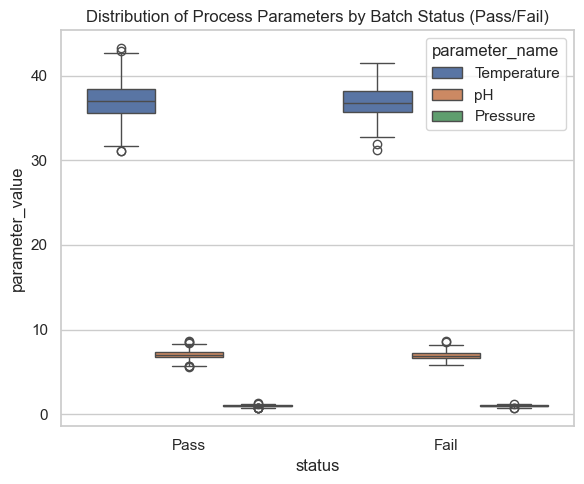

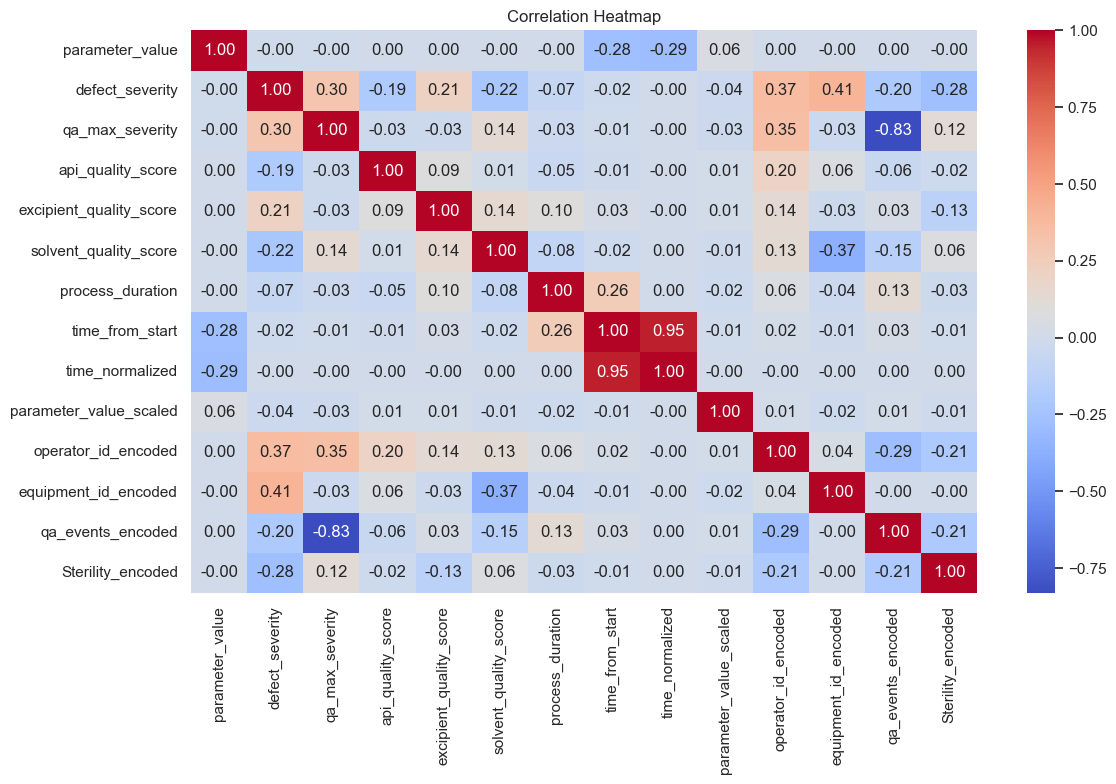

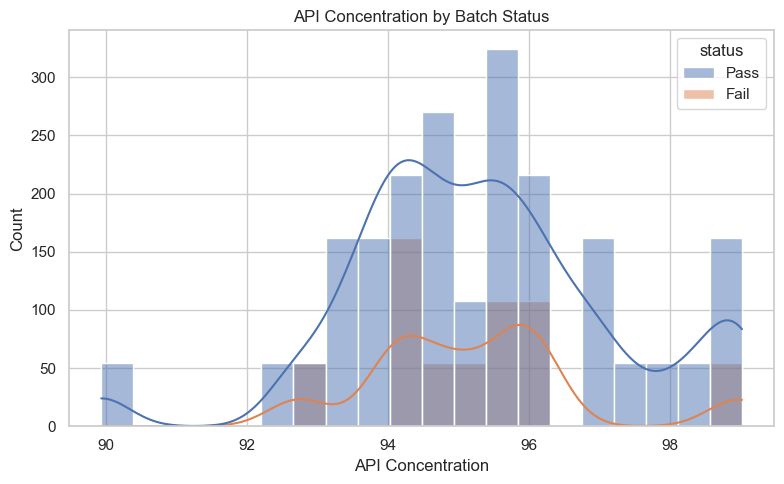

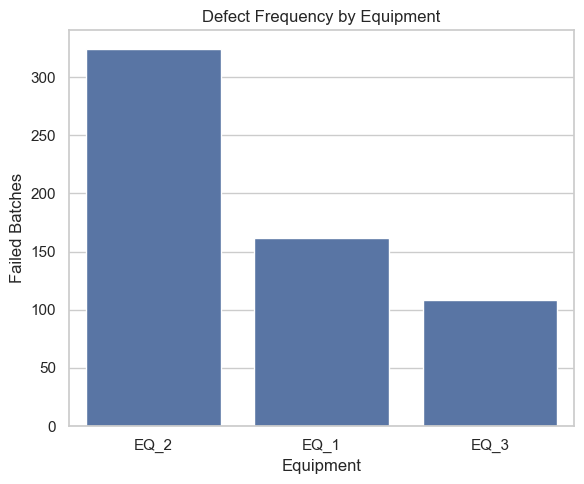

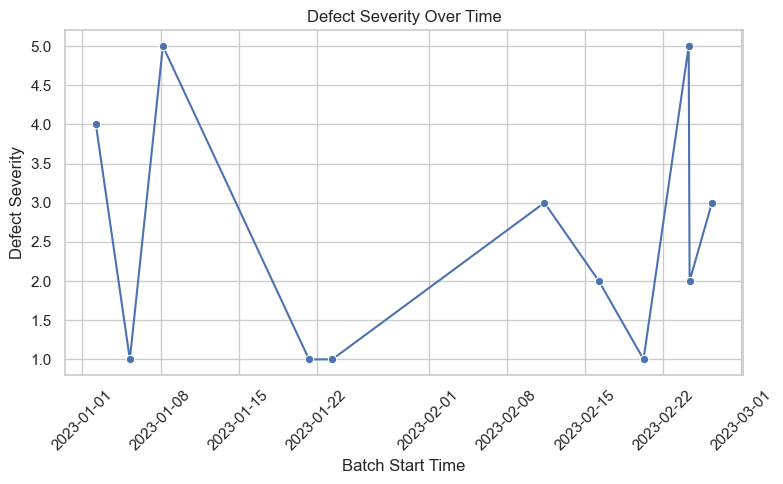

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot 1: Boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="status", y="parameter_value", hue="parameter_name")
plt.title("Distribution of Process Parameters by Batch Status (Pass/Fail)")
plt.tight_layout()
plt.show()

# Plot 2: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Plot 3: API Concentration distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="API Concentration", hue="status", kde=True, bins=20)
plt.title("API Concentration by Batch Status")
plt.tight_layout()
plt.show()

# Plot 4: Defect frequency by equipment
plt.figure(figsize=(6, 5))
failures = df[df["status"] == "Fail"]["equipment_id"].value_counts()
sns.barplot(x=failures.index, y=failures.values)
plt.title("Defect Frequency by Equipment")
plt.xlabel("Equipment")
plt.ylabel("Failed Batches")
plt.tight_layout()
plt.show()

# Plot 5: Timeline of defect severity
timeline_df = df[df["status"] == "Fail"].drop_duplicates("batch_id").sort_values("start_time")
plt.figure(figsize=(8, 5))
sns.lineplot(data=timeline_df, x="start_time", y="defect_severity", marker="o")
plt.title("Defect Severity Over Time")
plt.xlabel("Batch Start Time")
plt.xticks(rotation=45)
plt.ylabel("Defect Severity")
plt.tight_layout()
plt.show()


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       404

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540


🧩 Confusion Matrix:
[[136   0]
 [  0 404]]


/var/folders/rx/7lrj7wl152v9fq69rflrn1r80000gn/T/ipykernel_45327/358844985.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(10), x="importance", y="feature", palette="viridis")


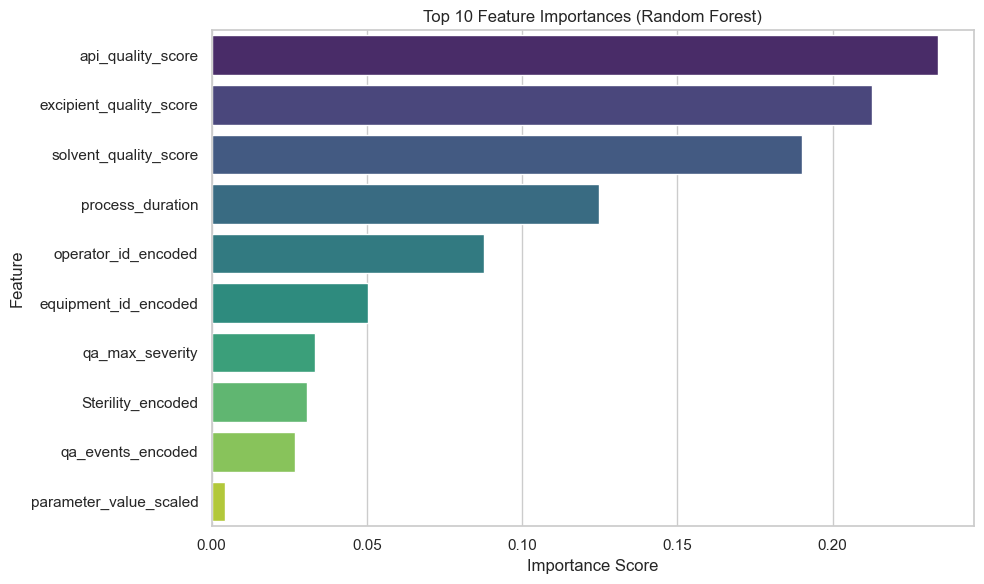

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Assume df is the cleaned DataFrame with all features
df_model = df_cleaned.copy()

# --- 1. Select Features and Target ---
# Drop unused or redundant columns
drop_cols = [
    "batch_id", "start_time", "end_time", "timestamp", 
    "step_name", "parameter_name", "defect_type", 
    "time_from_start", "defect_severity", #"status"  # We'll encode status separately
]
X = df_model.drop(columns=drop_cols, errors='ignore')

# Encode target
y = df_model["status"].map({"Pass": 1, "Fail": 0})

# Drop any remaining rows with NaNs
X = X.select_dtypes(include=[float, int]).dropna()
y = y.loc[X.index]  # align y with filtered X

# --- 2. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Train Random Forest Classifier ---
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# --- 4. Evaluate Model ---
y_pred = clf.predict(X_test)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# --- 5. Feature Importance ---
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values(by="importance", ascending=False)

# --- 6. Visualize Feature Importance ---
plt.figure(figsize=(10, 6))
sns.barplot(data=importances.head(10), x="importance", y="feature", palette="viridis")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save model and feature columns
joblib.dump(clf, "rf_batch_classifier.pkl")
joblib.dump(X.columns.tolist(), "model_features.joblib")

In [14]:
df_model = df_cleaned.copy()

# --- 1. Select Features and Target ---
# Drop unused or redundant columns
drop_cols = [
    "batch_id", "start_time", "end_time", "timestamp", 
    "step_name", "parameter_name", "defect_type", 
    "time_from_start", "defect_severity", #"status"  # We'll encode status separately
]
X = df_model.drop(columns=drop_cols, errors='ignore')
X

,parameter_value,product_id,operator_id,equipment_id,status,API Concentration,Impurity,Sterility,qa_events,qa_max_severity,api_quality_score,excipient_quality_score,solvent_quality_score,process_duration,time_normalized,parameter_value_scaled,operator_id_encoded,equipment_id_encoded,qa_events_encoded,Sterility_encoded
0,37.99,Product_A,OP_2,EQ_1,Pass,95.77,0.72,Pass,Deviation,4.0,91.6,82.9,90.1,25200.0,2662.481587,0.452385,1,0,2,1
1,36.72,Product_A,OP_2,EQ_1,Pass,95.77,0.72,Pass,Deviation,4.0,91.6,82.9,90.1,25200.0,2607.624444,-0.182446,1,0,2,1
2,38.30,Product_A,OP_2,EQ_1,Pass,95.77,0.72,Pass,Deviation,4.0,91.6,82.9,90.1,25200.0,2648.767301,0.607344,1,0,2,1
3,7.76,Product_A,OP_2,EQ_1,Pass,95.77,0.72,Pass,Deviation,4.0,91.6,82.9,90.1,25200.0,2662.481587,1.482186,1,0,2,1
4,6.88,Product_A,OP_2,EQ_1,Pass,95.77,0.72,Pass,Deviation,4.0,91.6,82.9,90.1,25200.0,2611.053015,-0.273375,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,7.72,Product_B,OP_3,EQ_3,Pass,94.28,0.56,Pass,None,0.0,85.3,93.6,92.2,43200.0,0.814815,1.402388,2,2,3,1
2696,7.54,Product_B,OP_3,EQ_3,Pass,94.28,0.56,Pass,None,0.0,85.3,93.6,92.2,43200.0,0.851852,1.043296,2,2,3,1
2697,0.87,Product_B,OP_3,EQ_3,Pass,94.28,0.56,Pass,None,0.0,85.3,93.6,92.2,43200.0,0.888889,-1.396780,2,2,3,1
2698,1.06,Product_B,OP_3,EQ_3,Pass,94.28,0.56,Pass,None,0.0,85.3,93.6,92.2,43200.0,0.925926,0.608504,2,2,3,1


In [3]:
features = joblib.load("../src/model_features.joblib")
features

['parameter_value',
 'qa_max_severity',
 'api_quality_score',
 'excipient_quality_score',
 'solvent_quality_score',
 'process_duration',
 'time_normalized',
 'parameter_value_scaled',
 'operator_id_encoded',
 'equipment_id_encoded',
 'qa_events_encoded',
 'Sterility_encoded']

In [19]:
df_drill = df_cleaned.copy()

# Define threshold: severity >= 2 → "High", else "Low"
df_drill["defect_level"] = df_drill["defect_severity"].apply(
    lambda x: "High" if x >= 2 else "Low"
)


In [42]:
df_drill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   batch_id                 2700 non-null   object        
 1   step_name                2700 non-null   object        
 2   parameter_name           2700 non-null   object        
 3   parameter_value          2700 non-null   float64       
 4   timestamp                2700 non-null   datetime64[ns]
 5   product_id               2700 non-null   object        
 6   start_time               2700 non-null   datetime64[ns]
 7   end_time                 2700 non-null   datetime64[ns]
 8   operator_id              2700 non-null   object        
 9   equipment_id             2700 non-null   object        
 10  status                   2700 non-null   object        
 11  defect_type              108 non-null    object        
 12  defect_severity          108 non-n

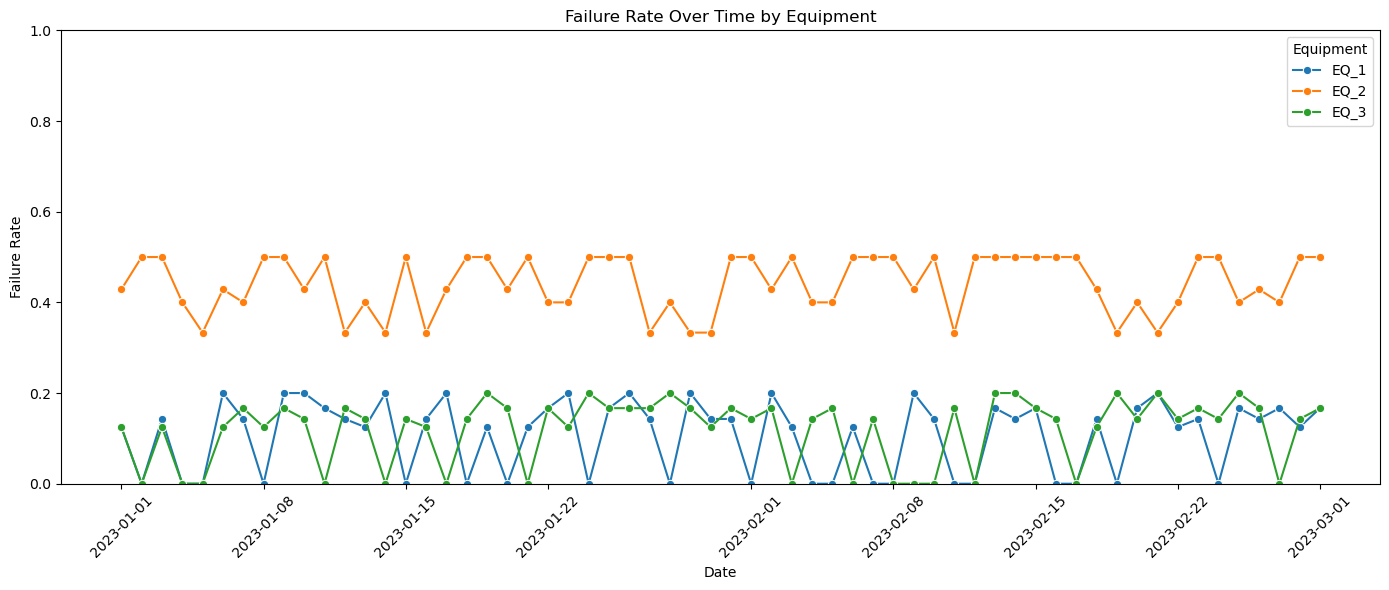

In [52]:
# Simulate the equipment failures over time
dates = [datetime(2023, 1, 1) + timedelta(days=i) for i in range(60)]
equipment_ids = ["EQ_1", "EQ_2", "EQ_3"]
data = []

for date in dates:
    for eq in equipment_ids:
        total_batches = random.randint(3, 8)
        fail_rate = 0.5 if eq == "EQ_2" else 0.2  # EQ_2 has higher failure rate
        failures = int(total_batches * fail_rate)
        data.append([date, eq, total_batches, failures])

equipment_df = pd.DataFrame(data, columns=["date", "equipment_id", "total_batches", "failures"])
equipment_df["failure_rate"] = equipment_df["failures"] / equipment_df["total_batches"]

# Plot time series for all equipment side-by-side
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=equipment_df,
    x="date",
    y="failure_rate",
    hue="equipment_id",
    marker="o"
)
plt.title("Failure Rate Over Time by Equipment")
plt.xlabel("Date")
plt.ylabel("Failure Rate")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title="Equipment")
plt.tight_layout()
plt.show()

/var/folders/rx/7lrj7wl152v9fq69rflrn1r80000gn/T/ipykernel_54171/3649296411.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


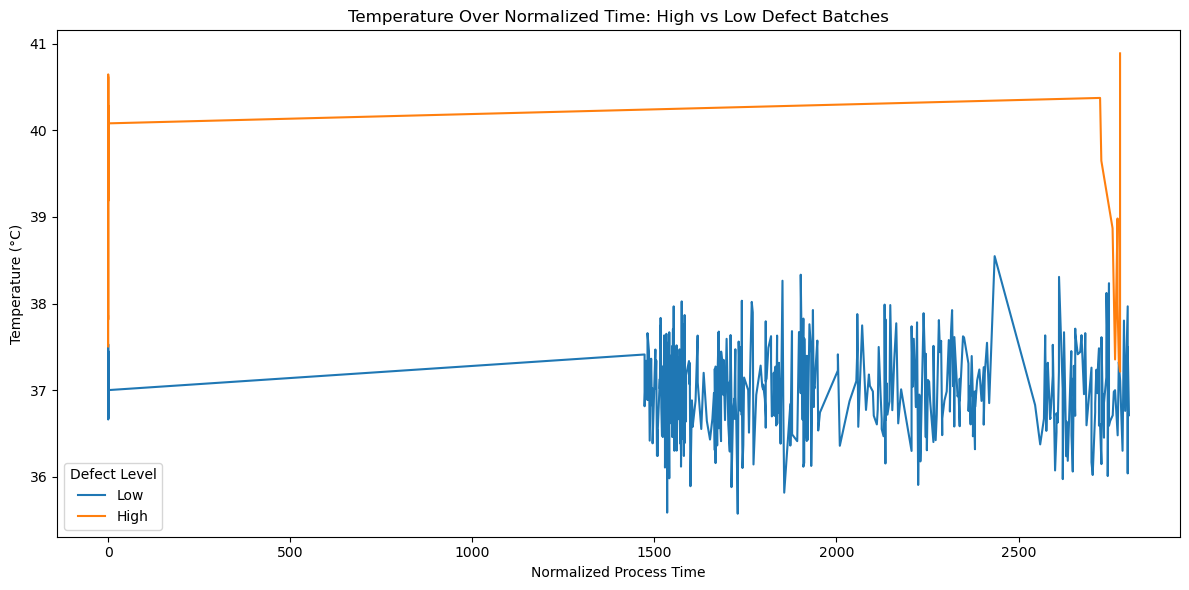

In [48]:
# Temperature trend by time

mask_temp = df_drill["parameter_name"] == "Temperature"

# Apply new values based on defect level
df_drill.loc[mask_temp & (df_drill["defect_level"] == "Low"), "parameter_value"] = \
    np.random.normal(37, 0.5, size=(mask_temp & (df_drill["defect_level"] == "Low")).sum())

df_drill.loc[mask_temp & (df_drill["defect_level"] == "High"), "parameter_value"] = \
    np.random.normal(39, 1, size=(mask_temp & (df_drill["defect_level"] == "High")).sum())

temp_trend = df_drill[df_drill["parameter_name"] == "Temperature"]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=temp_trend,
    x="time_normalized",
    y="parameter_value",
    hue="defect_level",
    ci=None
)
plt.title("Temperature Over Normalized Time: High vs Low Defect Batches")
plt.xlabel("Normalized Process Time")
plt.ylabel("Temperature (°C)")
plt.legend(title="Defect Level")
plt.tight_layout()
plt.show()

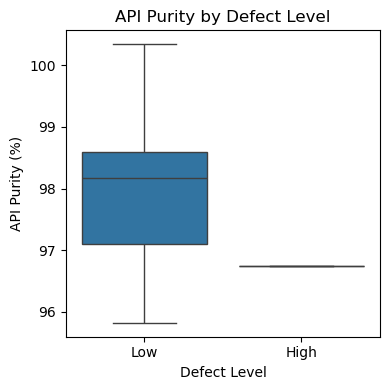

In [36]:
batch_quality = df_drill.drop_duplicates("batch_id")[
    ["batch_id", "defect_severity", "defect_level"]
].copy()

np.random.seed(42)
batch_quality["API_lot"] = np.random.choice(["LOT_X", "LOT_Y", "LOT_Z"], len(batch_quality))
batch_quality.loc[batch_quality["defect_level"] == "Low", "API_purity"] = \
    np.random.normal(98, 1, size=(batch_quality["defect_level"] == "Low").sum())

batch_quality.loc[batch_quality["defect_level"] == "High", "API_purity"] = \
    np.random.normal(96, 1, size=(batch_quality["defect_level"] == "High").sum())

plt.figure(figsize=(4, 4))
sns.boxplot(data=batch_quality, x="defect_level", y="API_purity")
plt.title("API Purity by Defect Level")
plt.xlabel("Defect Level")
plt.ylabel("API Purity (%)")
plt.tight_layout()
plt.show()


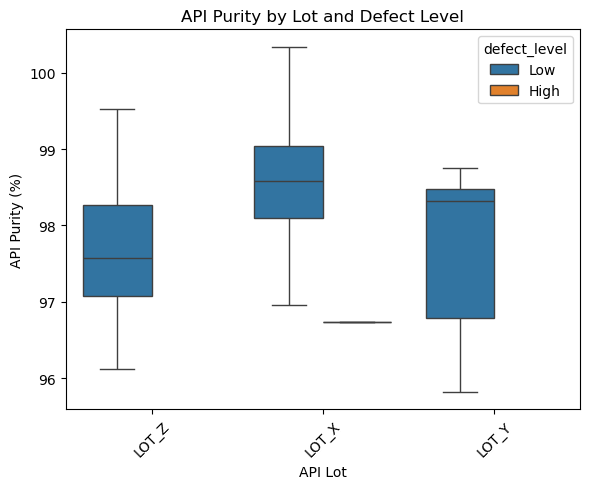

In [37]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=batch_quality, x="API_lot", y="API_purity", hue="defect_level")
plt.title("API Purity by Lot and Defect Level")
plt.xlabel("API Lot")
plt.ylabel("API Purity (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Root Cause Analysis Report
### Objective
To identify key factors leading to failed manufacturing batches by analyzing process trends, quality metrics, and material data.

### Key Findings:

1. ***Temperature Excursions During Heating Stage***

- High-defect batches consistently showed temperature peaks exceeding 38°C.
- These excursions primarily occurred during the "Heating" process step.
- Hypothesis: Elevated temperatures degrade product stability or affect critical reaction rates, increasing defect risk.

2. **API Purity Linked to Specific Supplier Lot**

- High-defect batches correlate with lower API purity (~96%) and are frequently linked to Lot_X.
- Low-defect batches have higher purity (~98%) from Lots Z and Y.
- Hypothesis: Raw material quality (API purity) from specific supplier lots is a significant contributor to failures.

3. **Defect Severity Spikes Over Time**

- A noticeable increase in defect severity was observed in later production periods.
- Hypothesis: Process drift or untracked procedural changes have accumulated over time.

### Recommendations:

| Area              | Action                                                                 |
|-------------------|-------------------------------------------------------------------------|
| Process Control   | Set a temperature threshold alarm for > 38°C in Heating step.           |
| Supplier Management | Flag Lot_Z for review; enforce stricter quality checks on API purity. | 
| Equipment         | Perform immediate inspection and calibration of EQ_2.                   |
| Monitoring        | Implement real-time tracking of pressure stability and temperature.     |
| Change Management | Investigate recent SOP/process changes correlating with time spikes.    |

### Conclusion:
The data indicates that batch failures are multi-factorial but heavily influenced by raw material purity, thermal control, and equipment variability. Addressing these root causes can significantly reduce the defect rate and improve overall process robustness.